In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Завантаження датасету
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 23s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 4s 1us/step


In [16]:
# Подивимось розміри датасету
print(f"Розмір тренувальної вибірки:\nКількість прикладів = {x_train.shape[0]}\nРозмір картинки в пікселях = {x_train.shape[1]}x{x_train.shape[2]}", '\n'+'-'*35)

print(f"Розмір тестової вибірки:\nКількість прикладів = {x_test.shape[0]}\nРозмір картинки в пікселях = {x_test.shape[1]}x{x_test.shape[2]}")

Розмір тренувальної вибірки:
Кількість прикладів = 60000
Розмір картинки в пікселях = 28x28 
-----------------------------------
Розмір тестової вибірки:
Кількість прикладів = 10000
Розмір картинки в пікселях = 28x28


In [17]:
# Перевірка унікальних значень міток
print("Унікальні мітки:", np.unique(y_train))

Унікальні мітки: [0 1 2 3 4 5 6 7 8 9]


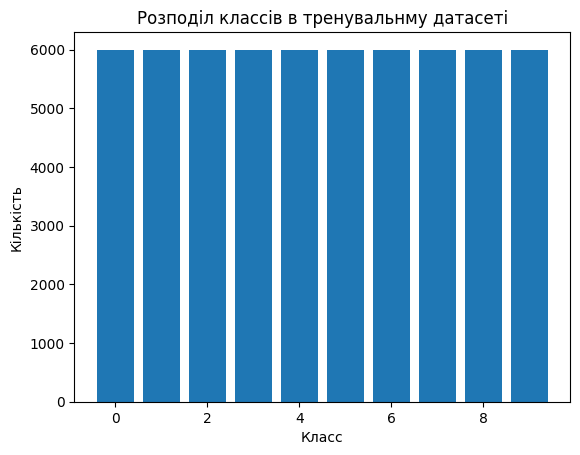

In [19]:
unique, counts = np.unique(y_train, return_counts=True)

plt.bar(unique, counts)
plt.xlabel("Класс")
plt.ylabel("Кількість")
plt.title("Розподіл классів в тренувальнму датасеті")
plt.show()

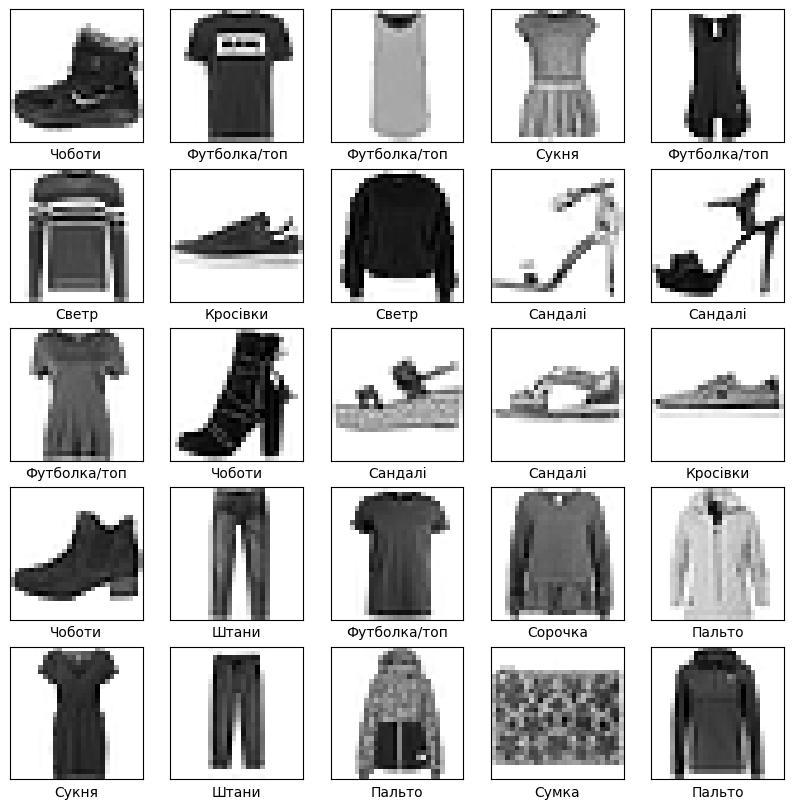

In [22]:
# Візуалізація кількох зображень
# Виведення кількох зображень з датасету
class_names = ['Футболка/топ', 'Штани', 'Светр', 'Сукня', 'Пальто', 'Сандалі', 'Сорочка', 'Кросівки', 'Сумка', 'Чоботи']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

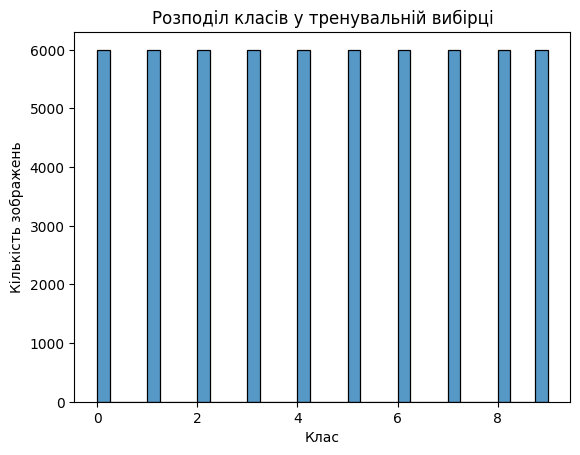

In [24]:
import seaborn as sns
# Побудова гістограми розподілу класів
sns.histplot(y_train)
plt.xlabel("Клас")
plt.ylabel("Кількість зображень")
plt.title("Розподіл класів у тренувальній вибірці")
plt.show()

In [26]:
# Нормалізація пікселів до діапазону [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [27]:
# Перетворення міток в one-hot encoding для використання з categorical_crossentropy
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [28]:
# Побудова та тренування базової нейронної мережі
model_mnist_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model_mnist_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [30]:
model_mnist_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
model_mnist_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [32]:
history_1 = model_mnist_1.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5621 - loss: 1.5887 - val_accuracy: 0.7462 - val_loss: 0.7443
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7509 - loss: 0.7041 - val_accuracy: 0.7729 - val_loss: 0.6190
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7805 - loss: 0.6073 - val_accuracy: 0.7897 - val_loss: 0.5729
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8017 - loss: 0.5584 - val_accuracy: 0.8107 - val_loss: 0.5326
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8141 - loss: 0.5270 - val_accuracy: 0.8162 - val_loss: 0.5121
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8251 - loss: 0.4977 - val_accuracy: 0.8259 - val_loss: 0.4908
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8317 - loss: 0.4833 - val_accuracy: 0.8321 - val_loss: 0.4791
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8347 - loss: 0.4705 

In [33]:
history_2 = model_mnist_2.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5467 - loss: 1.2509 - val_accuracy: 0.7732 - val_loss: 0.6291
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7773 - loss: 0.6062 - val_accuracy: 0.8013 - val_loss: 0.5436
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8139 - loss: 0.5189 - val_accuracy: 0.8173 - val_loss: 0.4942
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8253 - loss: 0.4839 - val_accuracy: 0.8332 - val_loss: 0.4586
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8416 - loss: 0.4437 - val_accuracy: 0.8426 - val_loss: 0.4395
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8477 - loss: 0.4269 - val_accuracy: 0.8469 - val_loss: 0.4266
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8532 - loss: 0.4091 - val_accuracy: 0.8512 - val_loss: 0.4101
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8572 - loss: 0.3965 

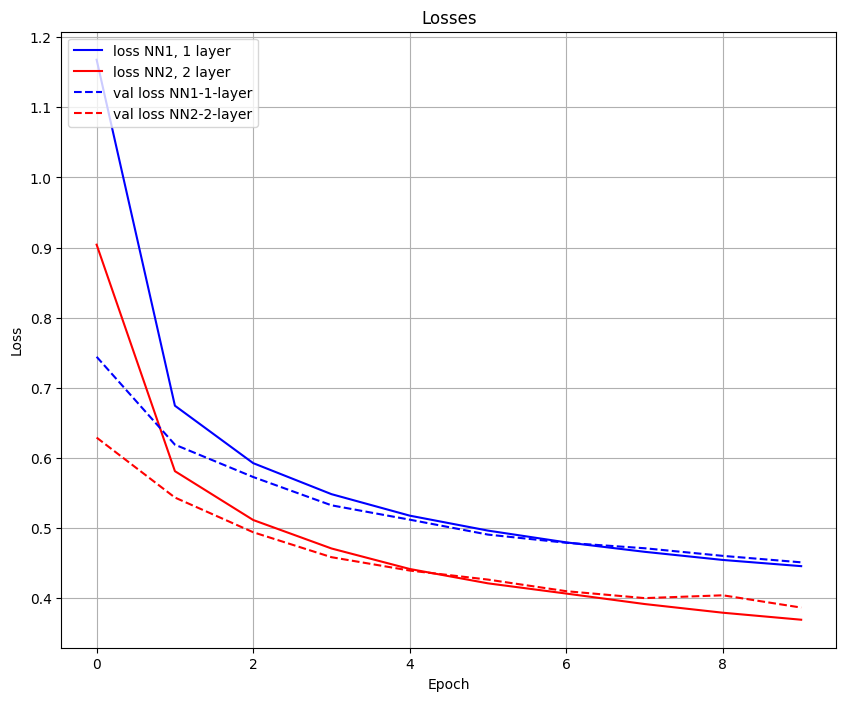

In [44]:
plt.figure(figsize=(10, 8))
plt.plot(history_1.history['loss'], color='blue', label='loss NN1, 1 layer')
plt.plot(history_2.history['loss'], color='red', label='loss NN2, 2 layer')
plt.plot(history_1.history['val_loss'], color='blue', ls='--', label='val loss NN1-1-layer')
plt.plot(history_2.history['val_loss'], color='red', ls='--', label='val loss NN2-2-layer')
plt.title('Функція втрат')
plt.ylabel('Втрати')
plt.xlabel('Кількість епох')
plt.grid()
plt.legend(loc='upper left')
plt.show()

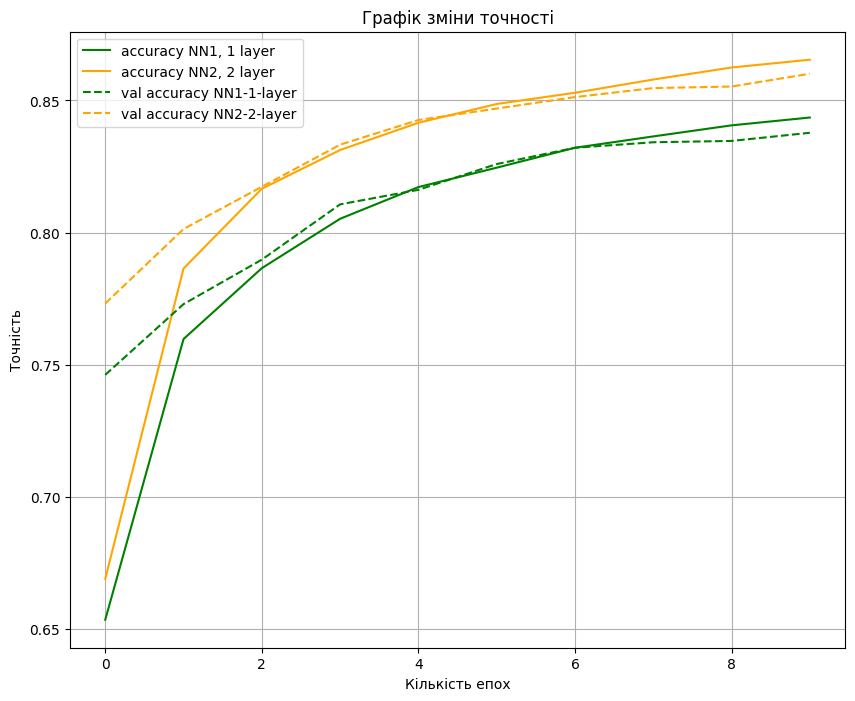

In [50]:
# Побудова графіків кривих навчання
plt.figure(figsize=(10, 8))
plt.plot(history_1.history['accuracy'], color='green', label='accuracy NN1, 1 layer')
plt.plot(history_2.history['accuracy'], color='orange', label='accuracy NN2, 2 layer')
plt.plot(history_1.history['val_accuracy'], color='green', ls='--', label='val accuracy NN1-1-layer')
plt.plot(history_2.history['val_accuracy'], color='orange', ls='--', label='val accuracy NN2-2-layer')
plt.title('Графік зміни точності')
plt.ylabel('Точність')
plt.xlabel('Кількість епох')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [53]:
# як бачимо з графіків модель починає перетреновуваться десь на 7 епохі, тож спробуємо застосувати early_stopping
# функція переініціалізаціі моделі. візьмемео модель з двома прихованими шарами яка показала кращі показники точності та функції втрат

def reinit_model():
    model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                              keras.layers.Dense(128, activation='relu'),
                              keras.layers.Dense(256, activation='relu'),
                              keras.layers.Dense(10, activation='softmax')])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [54]:
model = reinit_model()

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

# Створення callback'у ранньої зупинки, поставимо значення 2 епохи після яких зупинити тренування
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# Тренування моделі з ранньою зупинкою
history_es = model.fit(
    x_train, y_train, epochs=20,
    validation_split=0.2,
    callbacks=[early_stopping]
)
# для відтворення найкращих вагів моделі, моожемо поставити restore_best_weight=True, але показник loss в нас в тій позиція ще досить великий
# а розбіжність між тренувальним і валідаційним набором менше  за разницю між тій точкою, тож не будем

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5398 - loss: 1.2432 - val_accuracy: 0.7779 - val_loss: 0.6209
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7773 - loss: 0.6002 - val_accuracy: 0.7927 - val_loss: 0.5523
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8087 - loss: 0.5241 - val_accuracy: 0.8166 - val_loss: 0.5039
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8252 - loss: 0.4806 - val_accuracy: 0.8354 - val_loss: 0.4572
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8375 - loss: 0.4482 - val_accuracy: 0.8428 - val_loss: 0.4321
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8425 - loss: 0.4279 - val_accuracy: 0.8500 - val_loss: 0.4197
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8510 - loss: 0.4121 - val_accuracy: 0.8490 - val_loss: 0.4107
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8566 - loss: 0.3971 -

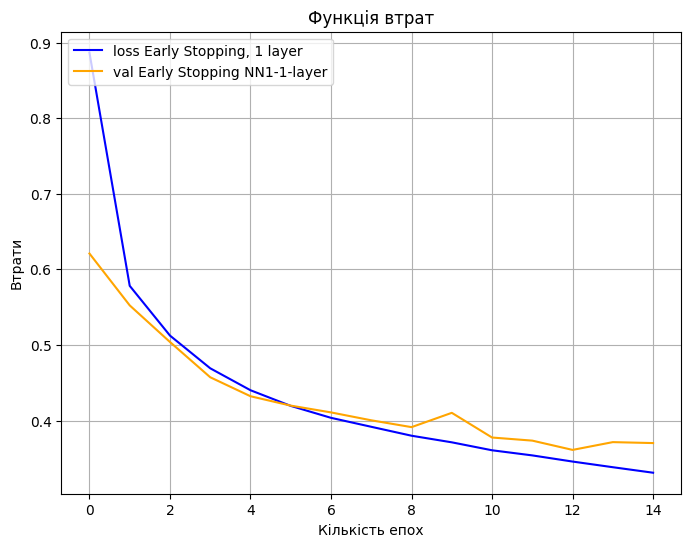

In [59]:
plt.figure(figsize=(8, 6))
plt.plot(history_es.history['loss'], color='blue', label='loss Early Stopping, 1 layer')
plt.plot(history_es.history['val_loss'], color='orange', label='val Early Stopping NN1-1-layer')
plt.title('Функція втрат')
plt.ylabel('Втрати')
plt.xlabel('Кількість епох')
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [64]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'model - Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


model - Test Loss: 0.3987, Test Accuracy: 0.8564


In [97]:
# оцінка на тестових даних показує точність 0.856, тож провкдкмо підбір різних гіперпараметрів
from tensorflow.keras import regularizers
def create_model_with_hparams(
    hidden_layers: int = 2,
    hidden_units: tuple = (128, 256),
    hidden_activation: str = "relu",
    kernel_initializer: str = "he_normal",
    use_l2: bool = False,
    use_dropout: bool = False,
    optimizer: str = "adam",
):
    if hidden_layers != len(hidden_units):
        raise ValueError('Задайте чисельність нейронів окремо для кожного слоя. hidden_layers == len(hidden_units)')
        
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))

    for _ in range(hidden_layers):
        model.add(keras.layers.Dense(
            hidden_units[_],
            activation=hidden_activation,
            kernel_initializer=kernel_initializer,
            kernel_regularizer=(regularizers.L2(1e-4) if use_l2 else None)
        ))
        if use_dropout:
            model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [83]:
# Прояснимо питання  впливу функції активації та ініціалізації
func_act = ["relu", "sigmoid", "tanh"]
initial = ['he_normal', 'glorot_uniform']

activations_histories = {}
for activation in func_act:
    for initialiation in initial:
        print(f"Тренування з активацією: {activation} та ініціалізацією: {initialiation}")
        model = create_model_with_hparams(hidden_activation=activation, kernel_initializer=initialiation)
    
        history = model.fit(x_train, y_train, epochs=15, validation_split=0.2,)
        activations_histories[activation + ', ' + initialiation] = history

Тренування з активацією: relu та ініціалізацією: he_normal
Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5732 - loss: 1.2214 - val_accuracy: 0.7758 - val_loss: 0.6002
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7849 - loss: 0.5843 - val_accuracy: 0.8075 - val_loss: 0.5379
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8149 - loss: 0.5116 - val_accuracy: 0.8134 - val_loss: 0.5153
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8324 - loss: 0.4712 - val_accuracy: 0.8291 - val_loss: 0.4611
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8447 - loss: 0.4422 - val_accuracy: 0.8434 - val_loss: 0.4348
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8507 - loss: 0.4141 - val_accuracy: 0.8483 - val_loss: 0.4248
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8537 - loss: 0.4066 - val_accuracy: 0.8535 - val_loss: 0.4050
Epoch 8/15
1500/1500 ━━━━━━━━━━

In [84]:
def plot_histories_dict(histories_dict):
    # train
    plt.figure(figsize=(12, 6))

    for name, history in histories_dict.items():
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label=f'{name} - Train Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label=f'{name} - Train Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Accuracy')
        plt.suptitle('TRAIN Losses and Accuracies')
        plt.legend()

    plt.tight_layout()
    plt.show()

    # validation
    plt.figure(figsize=(12, 6))

    for name, history in histories_dict.items():
        plt.subplot(1, 2, 1)
        plt.plot(history.history['val_loss'], label=f'{name} - Val Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['val_accuracy'], label=f'{name} - Val Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Accuracy')
        plt.suptitle('VALIDATION Losses and Accuracies')
        plt.legend()

    plt.tight_layout()
    plt.show()

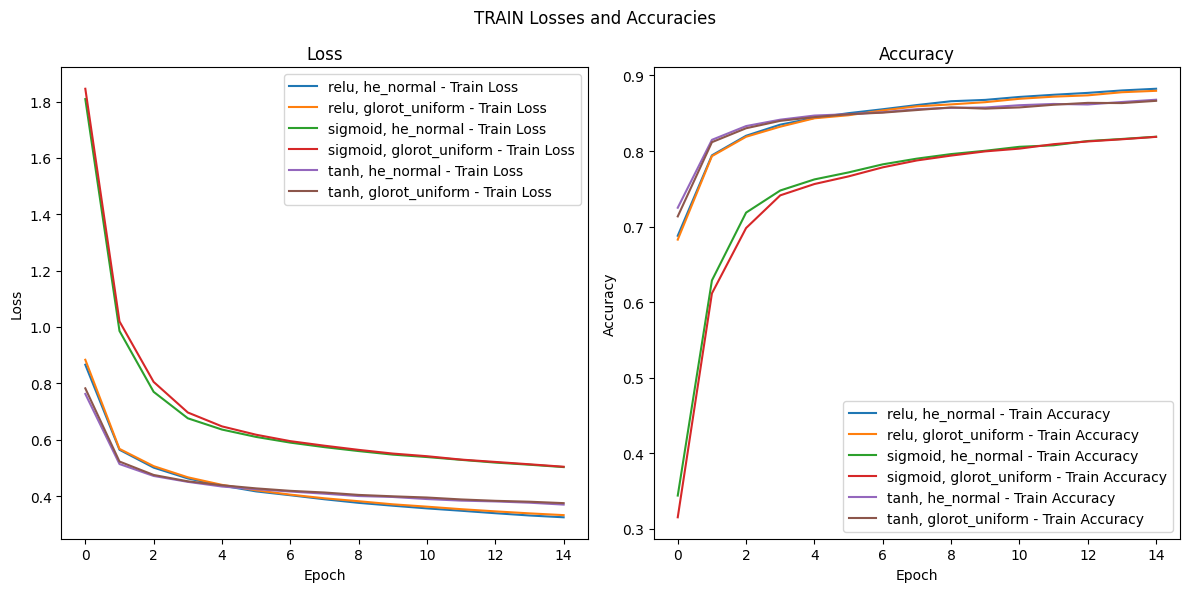

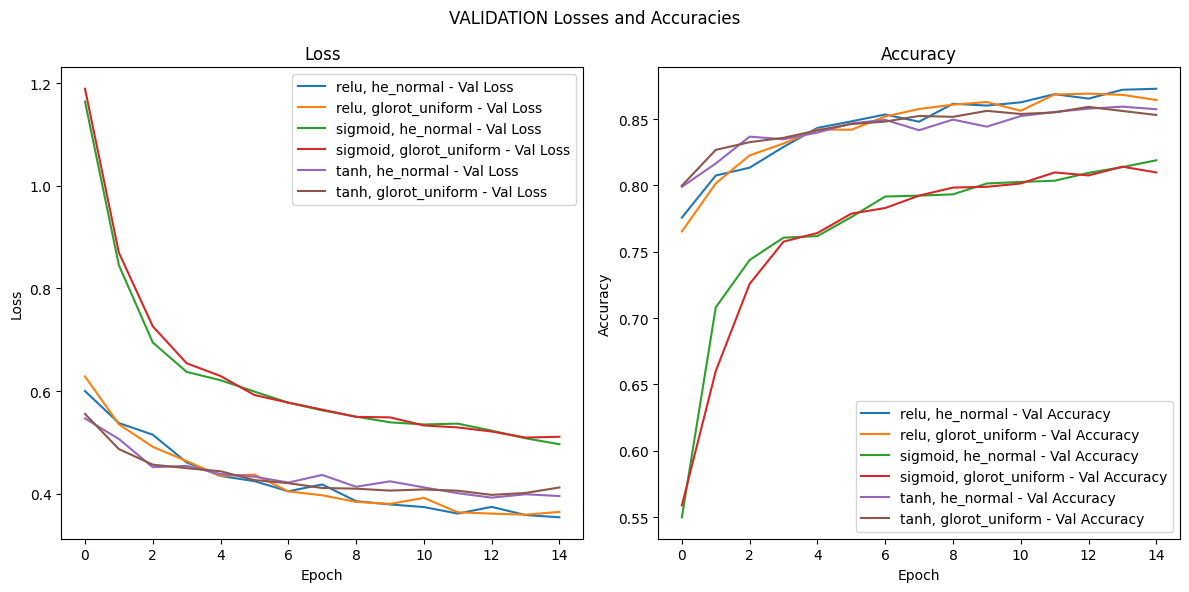

In [86]:
plot_histories_dict(activations_histories)

In [99]:
# щож, як бачимо топ 1 в наших змаганнях функція активації ReLU вібором ініціалізації he_normal як і було
# тепер спробуємо покерувати регулярізацією
reg_histories = {}

# модель без регулярізації з попередньо знайденими параметрами
reg = "<no regularization>"
print(f"Тренування з {reg}...")
model_wr = create_model_with_hparams()
history = model_wr.fit(x_train, y_train, epochs=15, validation_split=0.2)

reg_histories[reg] = history

# регулярізація l2
reg = "<l2 regularization>"
print(f"Тренування з {reg}...")
model_l2 = create_model_with_hparams(use_l2=True)
history = model_l2.fit(x_train, y_train, epochs=15, validation_split=0.2)

reg_histories[reg] = history

# регулярізація l2 і dropout
reg = "<l2 and dropout regularizations>"
print(f"Training withТренування з {reg}...")
model = create_model_with_hparams(use_l2=True, use_dropout=True)
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2)

reg_histories[reg] = history

Тренування з <no regularization>...
Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5849 - loss: 1.1698 - val_accuracy: 0.7848 - val_loss: 0.5820
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7924 - loss: 0.5709 - val_accuracy: 0.8176 - val_loss: 0.5093
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8230 - loss: 0.4915 - val_accuracy: 0.8319 - val_loss: 0.4672
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8381 - loss: 0.4488 - val_accuracy: 0.8401 - val_loss: 0.4475
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8496 - loss: 0.4245 - val_accuracy: 0.8508 - val_loss: 0.4134
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8557 - loss: 0.3998 - val_accuracy: 0.8553 - val_loss: 0.4021
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8601 - loss: 0.3855 - val_accuracy: 0.8612 - val_loss: 0.3860
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/ste

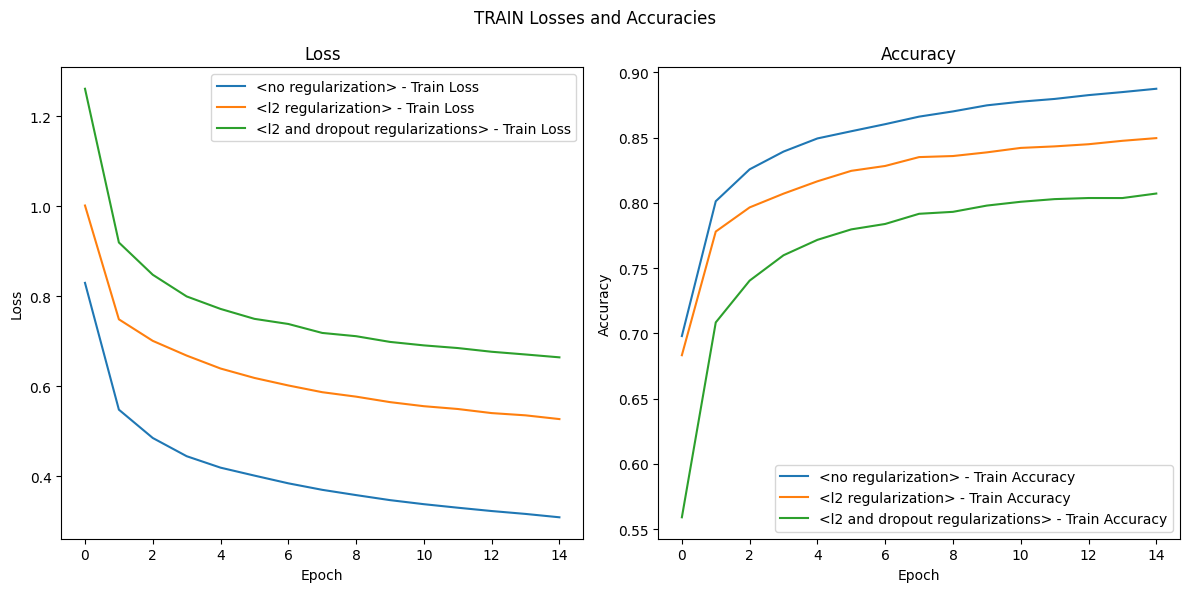

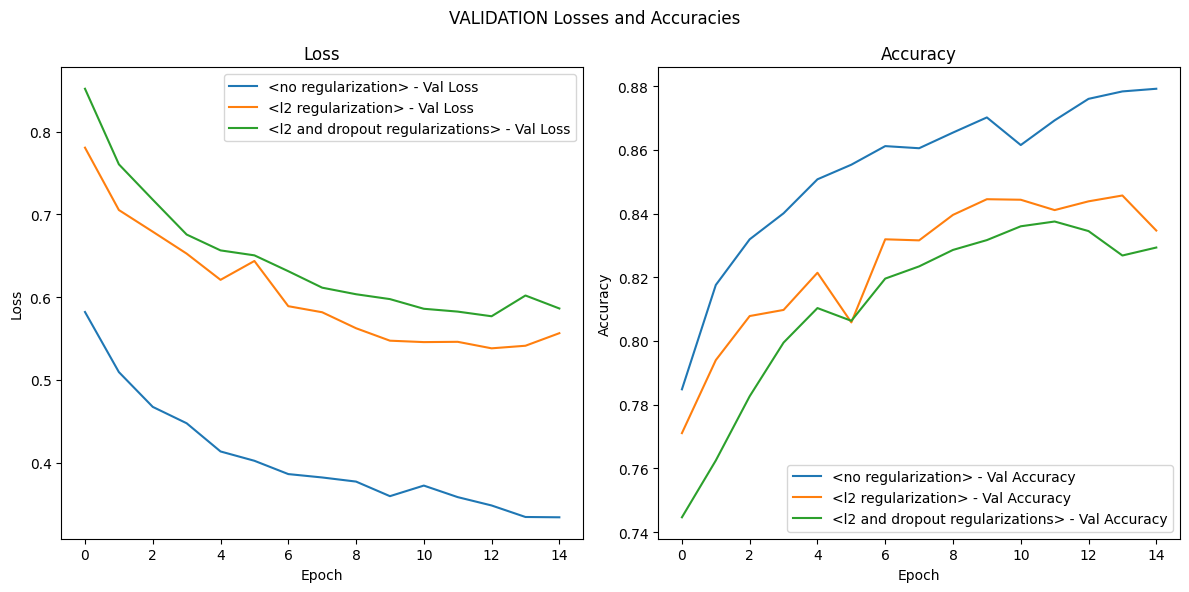

In [100]:
plot_histories_dict(reg_histories)

In [102]:
optimizer_histories = {}
for optimizer in ["sgd", "rmsprop", "adam"]:
    print(f"Training with {optimizer} optimizer...")
    model = create_model_with_hparams(optimizer=optimizer)
    history = model.fit(x_train, y_train, epochs=15, validation_split=0.2)
    optimizer_histories[optimizer] = history

Training with sgd optimizer...
Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1490 - loss: 2.2989 - val_accuracy: 0.1030 - val_loss: 2.2968
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1845 - loss: 2.2966 - val_accuracy: 0.0957 - val_loss: 2.2950
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1598 - loss: 2.2942 - val_accuracy: 0.1083 - val_loss: 2.2919
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2074 - loss: 2.2912 - val_accuracy: 0.2701 - val_loss: 2.2885
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.2124 - loss: 2.2872 - val_accuracy: 0.1515 - val_loss: 2.2836
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2188 - loss: 2.2817 - val_accuracy: 0.3636 - val_loss: 2.2758
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2443 - loss: 2.2740 - val_accuracy: 0.3020 - val_loss: 2.2655
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - 

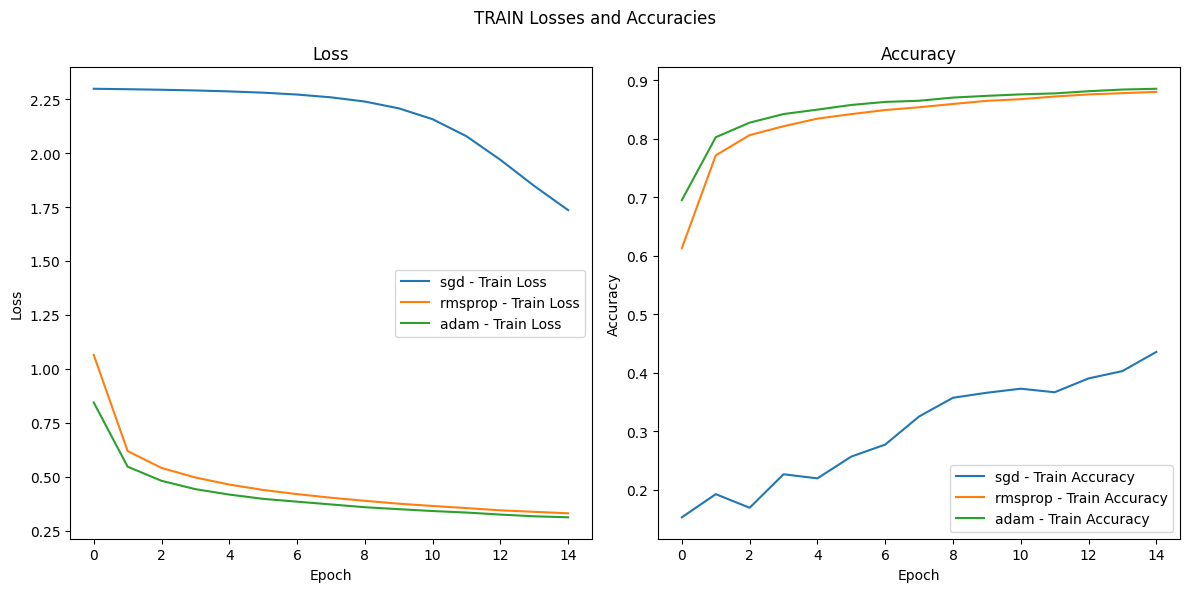

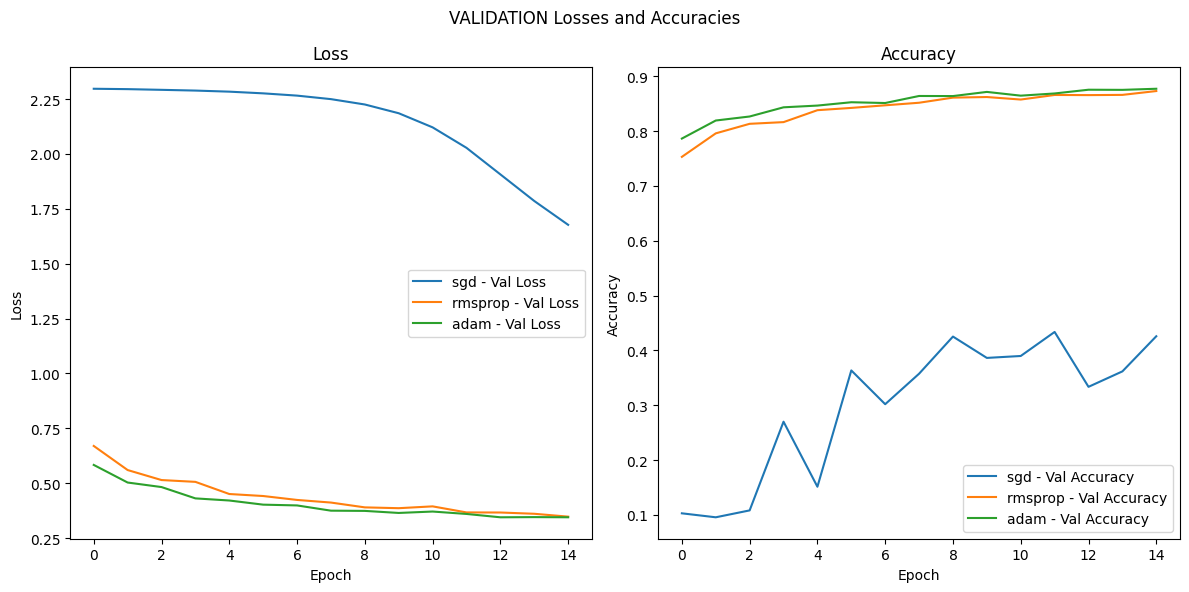

In [103]:
plot_histories_dict(optimizer_histories)
# найкращим з оптимайзерів залишився Adam

In [109]:
# Проведемо дослідженн як вплинуне зміна розподілу нейронів по шарам, і додавання ще одного шару
units_histories = {}
layers = [2, 2, 2, 3]
units =[(64, 64), (64, 128), (128, 256), (128, 64 ,64)]
for num, layer in enumerate(layers):
    print(f"Тренування мережі з {layer} шарів, кількість нейронів {units[num]}")
    model = create_model_with_hparams(hidden_layers=layer, hidden_units=units[num])
    history = model.fit(x_train, y_train, epochs=15, validation_split=0.2)
    units_histories[str(layer) + '-шарова ' + str(units[num])] = history

Тренування мережі з 2 шарів, кількість нейронів (64, 64)
Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5036 - loss: 1.4070 - val_accuracy: 0.7502 - val_loss: 0.6703
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7662 - loss: 0.6375 - val_accuracy: 0.7816 - val_loss: 0.5881
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7924 - loss: 0.5714 - val_accuracy: 0.8041 - val_loss: 0.5490
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8062 - loss: 0.5341 - val_accuracy: 0.8150 - val_loss: 0.5214
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8180 - loss: 0.5051 - val_accuracy: 0.8246 - val_loss: 0.4941
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8303 - loss: 0.4810 - val_accuracy: 0.8299 - val_loss: 0.4755
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8374 - loss: 0.4621 - val_accuracy: 0.8331 - val_loss: 0.4704
Epoch 8/15
1500/1500 ━━━━━━━━━━━

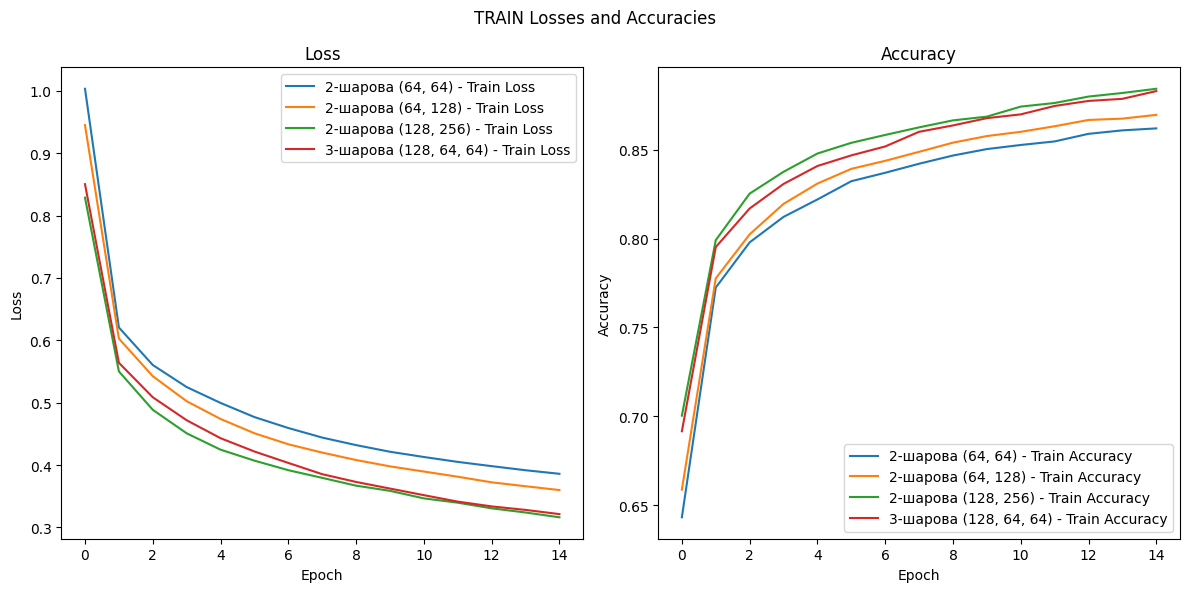

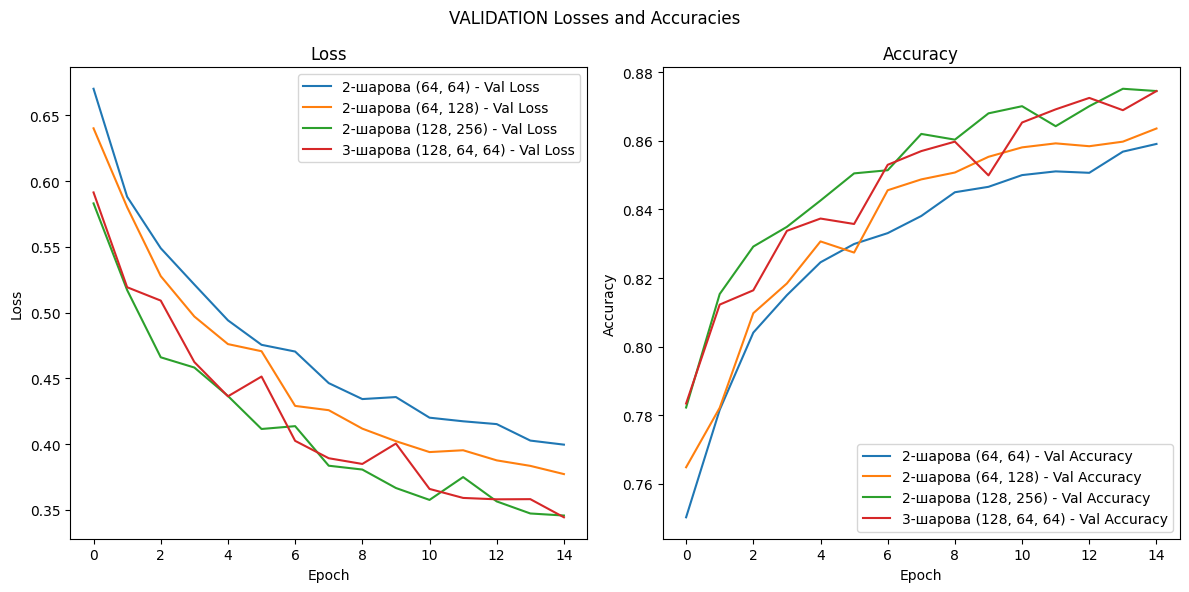

In [113]:
plot_histories_dict(units_histories)


In [115]:
# як бачимо збільшення кількості шарів до 3 нічо нам не додає, тож збільшимо кількість нейронів і побудуємо графіки
units_histories_dop = {}
layers_dop = [2, 2, 3]
units_dop =[(256, 512), (512, 256), (128, 128, 256)]
for num, layer in enumerate(layers_dop):
    print(f"Тренування мережі з {layer} шарів, кількість нейронів {units_dop[num]}")
    model = create_model_with_hparams(hidden_layers=layer, hidden_units=units_dop[num])
    history = model.fit(x_train, y_train, epochs=15, validation_split=0.2)
    units_histories_dop[str(layer) + '-шарова ' + str(units_dop[num])] = history

Тренування мережі з 2 шарів, кількість нейронів (256, 512)
Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6161 - loss: 1.0584 - val_accuracy: 0.7962 - val_loss: 0.5589
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8090 - loss: 0.5257 - val_accuracy: 0.8314 - val_loss: 0.4697
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8368 - loss: 0.4515 - val_accuracy: 0.8464 - val_loss: 0.4217
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8490 - loss: 0.4138 - val_accuracy: 0.8444 - val_loss: 0.4152
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8584 - loss: 0.3941 - val_accuracy: 0.8596 - val_loss: 0.3895
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8624 - loss: 0.3729 - val_accuracy: 0.8562 - val_loss: 0.3917
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.8703 - loss: 0.3517 - val_accuracy: 0.8689 - val_loss: 0.3661
Epoch 8/15
1500/1500 

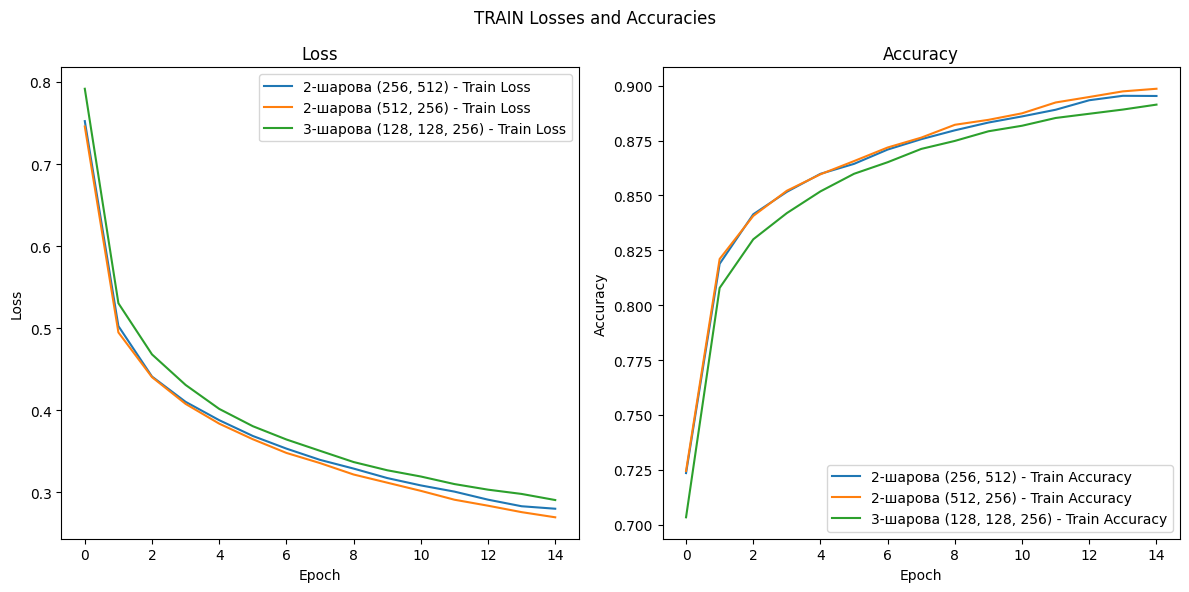

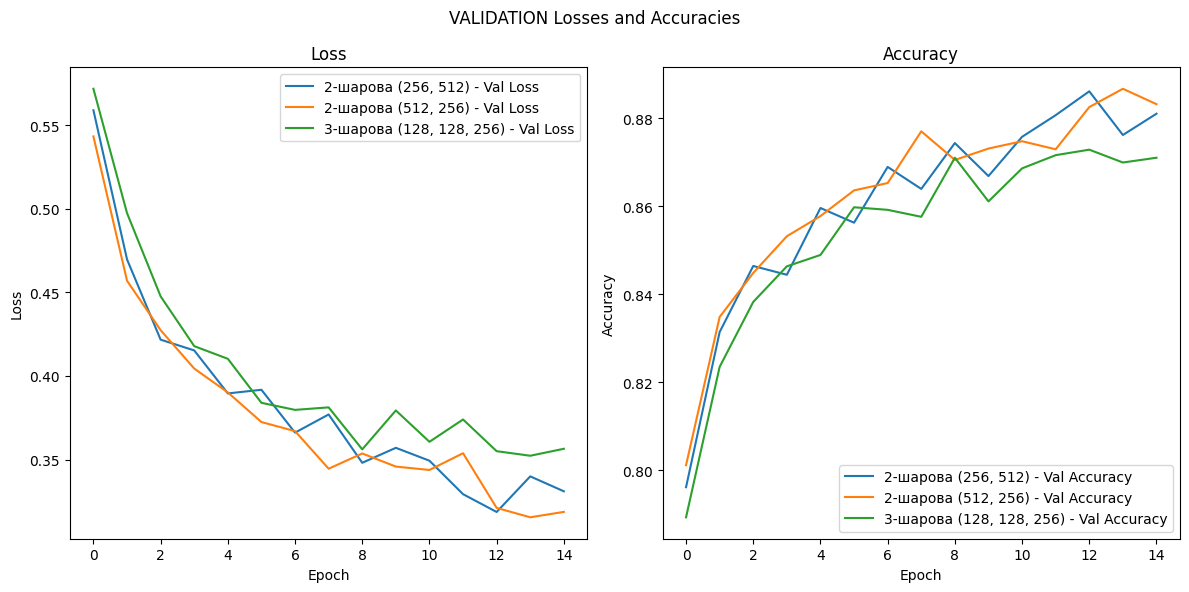

In [116]:
plot_histories_dict(units_histories_dop)
# найкращою виявилися мережа з 2 шарів, кількість нейронів (512, 256)

In [124]:
# порівняємо як зміняться наші показники при зміні розміру батчу від 32(по замовчуванню) 256 також збільшимо кількість єпох до 25
bs_histories = {}
for bs in [32, 64, 256]:    
    print(f"Тренування при кількості пакетів: {bs}, та кількості епох: 25")
    model = create_model_with_hparams(hidden_layers=2, hidden_units=(512, 256))
    
    history = model.fit(x_train, y_train, epochs=25, batch_size=bs, validation_split=0.2)
    bs_histories['batсh:', str(bs)] = history

Тренування при кількості пакетів: 32, та кількості епох: 25
Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.6144 - loss: 1.0602 - val_accuracy: 0.8023 - val_loss: 0.5522
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8142 - loss: 0.5164 - val_accuracy: 0.8183 - val_loss: 0.4877
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8383 - loss: 0.4475 - val_accuracy: 0.8403 - val_loss: 0.4393
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.8493 - loss: 0.4176 - val_accuracy: 0.8508 - val_loss: 0.4134
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - accuracy: 0.8586 - loss: 0.3900 - val_accuracy: 0.8583 - val_loss: 0.3914
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8670 - loss: 0.3688 - val_accuracy: 0.8638 - val_loss: 0.3672
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8717 - loss: 0.3506 - val_accuracy: 0.8615 - val_loss: 0.3715
Epoch 8/25
1500/

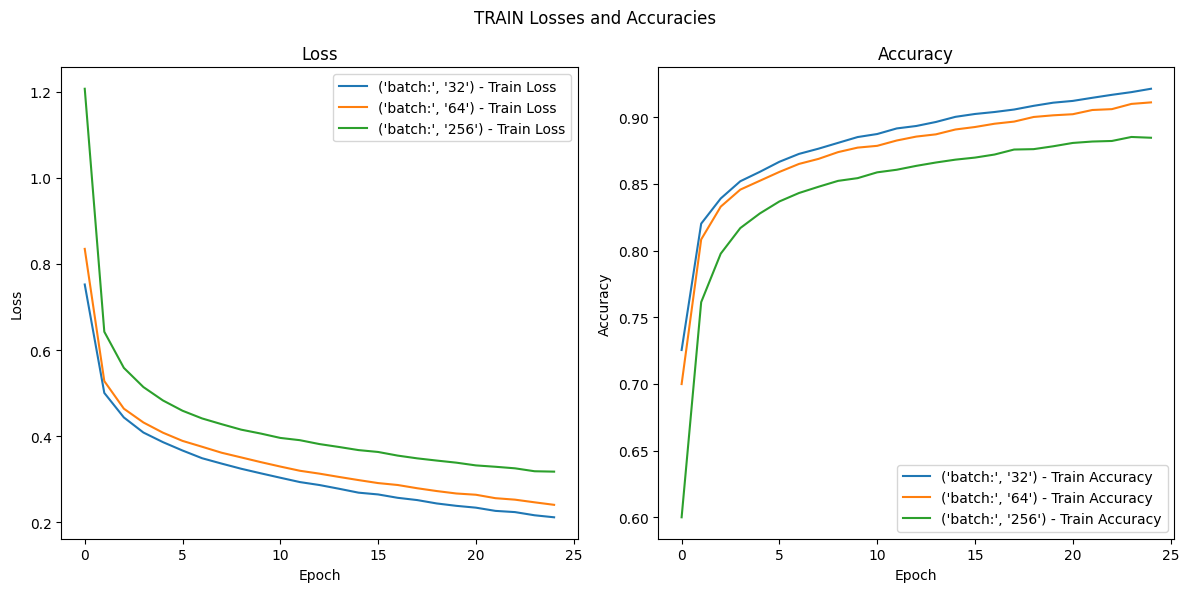

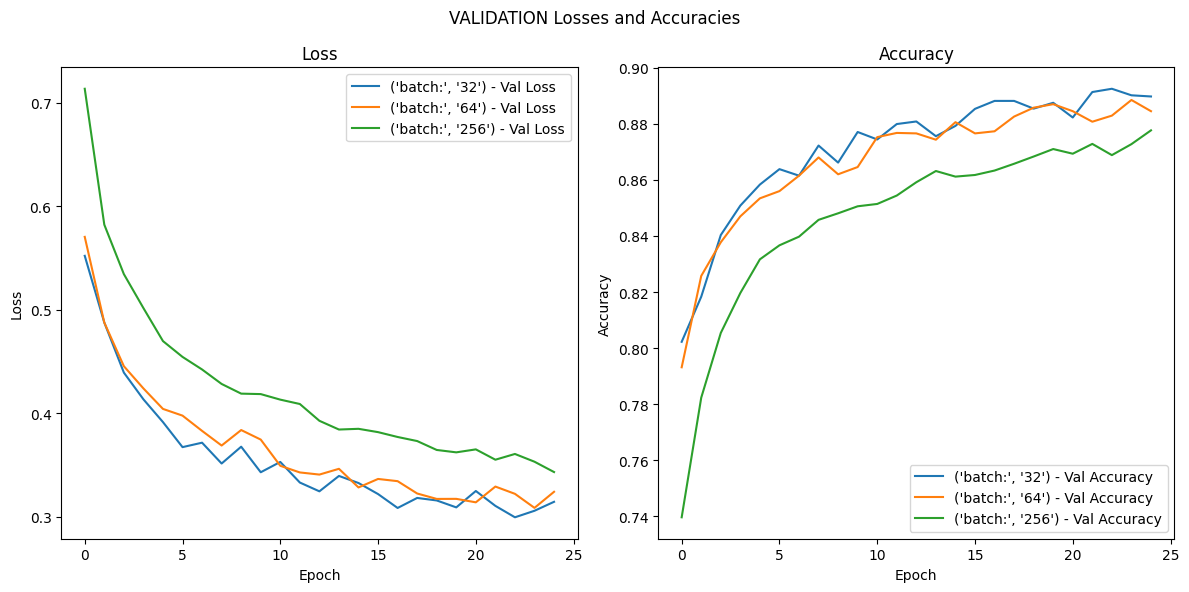

In [125]:
plot_histories_dict(bs_histories)